# <span style="color:red"> Targeted-from-mzML notebook for IODA</span>

**Purpose**: The IODA targeted-from-mzML workflow detects ions to be used as targets for iterative optimised data acquisition (IODA) of fragmentation spectra in LC-MS. The targets are detected in the "reference" sample, and background ions are detected in the "blank" sample. Background ions are excluded from the targets. The targets can be acquired by IODA in one or multiple experiments for higher coverage.

**Usage**: This notebook runs OpenMS processing on two mzML files uploaded by the user. The OpenMS processing performs feature detection/alignment, and outputs an mzTab file with ions/features detected. The IODA-targeted workflow defines the targets, and these are then formatted for XCalibur or [MaxQuant.Live](http://www.maxquant.live/).

**Documentation**: Please refer to the main documentation page for more informations on the OpenMS worklow used. [See here](link).

**Instructions**: Follow the instructions below and run the notebook cells accordingly.

### Step 0 - Run your LC-MS mass spectrometry experiments

Analyse your reference and "blank" samples by LC-MS.

<span style="color:brown">**IMPORTANT**</span>: The chromatographic and mass spectrometry conditions must be identical for all the samples analyzed with IODA. Note that there is no need for MS/MS acquisition for the reference and blank, as feature detection/alignment with OpenMS is performed only on the MS1 level. The following IODA-targeted experiments requires MS/MS acquisition.


### Step 1 - Convert from .raw to .mzML file format

You can use the [GNPS Quickstart interface web-interface](https://gnps-quickstart.ucsd.edu/conversion) to convert your .raw file(s) into .mzML file(s). The GNPS documentation provides [instructions](https://ccms-ucsd.github.io/GNPSDocumentation/fileconversion/) for converting MSConvert. Note that the spectra have to be centroided. Download the converted files.


### Step 2 - Upload the mzML files

##### <span style="color:brown">Method 1 - Upload your mzML files</span>

Upload your mzML files on the Binder server with the Jupyter lab interface (drag-and-drop the file in the left panel or use the "Upload" icon). 

##### <span style="color:brown">Method 2 - Web-sharing links</span>
We support retrieving the files from the following cloud sharing services:
> **Google Drive** : copy the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

> **MassIVE/GNPS repository** : copy the link for each files.

### Step 3 - Specify the link or path to the mzML files
Specificy the filename or download link for the mzML files in the cell below. The "blank sample for the *input_BLANK* object and the reference sample in for the *input_SAMPLE* object. The string for the link/path must be between parenthesis, such as: `my_reference_sample.mzML` or `input_folder/my_reference_sample.mzML`. 

*These test files could be used*:\
`input_BLANK = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"` \
`input_SAMPLE = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"`
<!--These are various test jobs 
    # Test samples
        #input_BLANK = "https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
        #input_SAMPLE = "https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"
        #input_BLANK = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
        #input_SAMPLE = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"
        #input_BLANK = "https://drive.google.com/file/d/11p2Jau2T-gCQb9KZExWdC7dy8AQWV__l/view?usp=sharing"
        #input_SAMPLE = "https://drive.google.com/file/d/1_lOYEtsmEPAlfGVYbzJpLePPSitUp1yh/view?usp=sharing"
        #input_BLANK = "ftp://massive.ucsd.edu/MSV000083306/peak/QE_C18_mzML/QEC18_blank_SPE_20181227092326.mzML"
        #input_SAMPLE = "ftp://massive.ucsd.edu/MSV000083306/peak/QE_C18_mzML/QEC18_F1-1_F2-1_NIST-1_To-1_20181227135238.mzML"
-->

In [1]:
# Blank sample
input_BLANK = "20230150_LFX_EG_POS_MeOH-LF_MS1_1.mzML"
# Reference sample
input_SAMPLE = "20230146_LFX_EG_POS_qc-mix_MS1.mzML"
input_BLANK = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
input_SAMPLE = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"

### Step 4 - Set the variables for the OpenMS processing

**Specify the variables of the OpenMS processing**

Parameters should be optimised depending on the sample complexity and acquisition parameters. You can visualize the data of your mzML file with OpenMS/TOPPView to decide upon the best noise level, see the [documentation](documentation.ipynb).

The OpenMS workflow uses the Feature Finder Metabolomics (FFM) tool to detect LC-MS features/peaks. The parameters below are for the FFM tool. The minimum peak height for detected feature is set to 3 fold the noise level set.

##### Maximum mass error
> `ppm_error`: the maximum mass error allowed for the feature detection. A value of 10 ppm is recommended for a resolution of 35K or less (must be an integer/float).

##### Noise level
> `noise_level`: this is the MS1 noise level for the detection of narrow LC-MS features. The default value is 1E5 (must be an integer/float, can be in scientific format). 

TIPS: If your sample has a lot of features, increase the noise levels to limit the number of ions that are detected for subsequent exclusion.

In [2]:
ppm_error = 3
noise_level = 5E5
chrom_peak_snr = 3
elements_alphabet = 'CHNOPS'

### Step 5 - Run the OpenMS workflow

**Run the cell below to start the OpenMS processing**. Do not change the content. Look for the log printed.

In [3]:
from IODA_run_pyOpenMS_targeted import *
IODA_targeted_workflow(input_BLANK, input_SAMPLE, ppm_error,noise_level, chrom_peak_snr, elements_alphabet)

mkdir: cannot create directory ‘download_results’: File exists
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:46] 2023-03-15 22:31:58.606688
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:47] STARTING the IODA-targeted WORKFLOW
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:48] ======
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:49] Path to the input files: 
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:50] Blank: tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:51] Sample: tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:133] Copying the mzML files ...
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:63] 2023-03-15 22:31:58.611924
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:64] STARTING the IODA-targeted WORKFLOW with OpenMS
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:65] ======
[I 230315 22:31:58 IODA_run_pyOpenMS_targeted:66] Gettin

Mass Trace Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
Progress of 'mass trace detection':
Elution Peak Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
-- done [took 1.05 s (CPU), 1.04 s (Wall)] -- 
Feature Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
Progress of 'elution peak detection':
-- done [took 0.85 s (CPU), 0.39 s (Wall)] -- 
Progress of 'assembling mass traces to features':
-- done [took 0.01 s (CPU), 0.00 s (Wall)] -- 
Mass Trace Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML


[I 230315 22:32:01 IODA_run_pyOpenMS_targeted:335] ======
[I 230315 22:32:01 IODA_run_pyOpenMS_targeted:336] Completed the OpenMS workflow
[I 230315 22:32:01 IODA_run_pyOpenMS_targeted:337] ======
[I 230315 22:32:01 IODA_run_pyOpenMS_targeted:338] Zipping up the OpenMS workflow results ..


Progress of 'mass trace detection':
Elution Peak Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
-- done [took 0.48 s (CPU), 0.48 s (Wall)] -- 
Progress of 'elution peak detection':
-- done [took 0.04 s (CPU), 0.01 s (Wall)] -- 
Feature Detection:  OpenMS_workflow/OpenMS_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
Finished Feature Detection
Progress of 'assembling mass traces to features':
-- done [took 0.00 s (CPU), 0.00 s (Wall)] -- 
Progress of 'computing RT transformations':
-- done [took 0.00 s (CPU), 0.01 s (Wall)] -- 
Progress of 'linking features':
-- done [took 0.02 s (CPU), 0.01 s (Wall)] -- 


[I 230315 22:32:02 IODA_exclusion_workflow:156] All files zipped successfully!
[I 230315 22:32:02 IODA_run_pyOpenMS_targeted:341] ======
[I 230315 22:32:02 IODA_run_pyOpenMS_targeted:342] Completed zipping up the OpenMS workflow result files
[I 230315 22:32:02 IODA_run_pyOpenMS_targeted:344] ======
[I 230315 22:32:02 IODA_run_pyOpenMS_targeted:345] NOW CONTINUE WITH THE REST OF THE IODA-targeted WORKFLOW


### Step 6 - Specify the parameters of the IODA-targeted workflow
**Specify the parameter values for IODA-targeted workflow in the cell below:**

**Description**: At this step, we will generate target ions with the IODA-targeted workflow. 

The target ions are ions from the reference sample that are meeting some user-defined parameters. Valid target ions are those 1) that have an intensity above the minimum intensity defined and 2) that have an intensity ratio between the reference/blank samples above the defined value. The target ions can be splitted accross multiple iterative experiments. Retention time range above the peak apex for the target ions are also defined by the user.

>`min_intensity_value`: the minimum intensity (peak height) of an ion/feature in the reference sample to be considered as valid ion targets. Default = 1E5.

>`min_ratio_value`: minimum ratio for the intensity of an ion/feature (peak height) between the reference and blank samples (reference/blank). Only ions above that ratio will be valid ion targets. Default = 3.

>`experiment_number`: define the number of iterative experiment(s) to perform for the IODA-targeted workflow. If >2, the valid target ions will be splitted into multiple experiments. Default = 3, range 1-10.

>`pretarget_rt_margin`: Retention time margin before the target ion apex (in seconds). Default = 0.5.

>`posttarget_rt_margin`: Retention time margin after the target ion apex (in seconds). By default it is more than the `pretarget_rt_margin` due to the frequent non-gaussian nature of LC-MS features. Note that this value could be increased to reach the dynamic exclusion time parameter of the acquisition method. Default = 5.


In [4]:
min_intensity_value = 7E4
min_ratio_value = 5
experiment_number = 2
pretarget_rt_margin = 0.5
posttarget_rt_margin = 3
min_int_apex_ratio = 1

### Step 7 - Run the IODA-targeted workflow

**Simply run the cell below to start the IODA-targeted workflow**. Do not change the content. Look for the log.

In [5]:
from IODA_targeted_workflow2 import *
make_targeted_list_from_feature_table('pyOpenMS_generated', experiment_number, min_ratio_value, min_intensity_value,\
                              pretarget_rt_margin,posttarget_rt_margin,30, min_int_apex_ratio)

mkdir: cannot create directory ‘download_results’: File exists
rm: cannot remove 'results/logfile.txt': No such file or directory
[I 230315 22:32:02 IODA_targeted_workflow2:271] STARTING THE IODA targeted-from-FeatureTable WORKFLOW
[I 230315 22:32:02 IODA_targeted_workflow2:273] The feature table was generated with the IODA-OpenMS workflow
[I 230315 22:32:02 IODA_targeted_workflow2:275] This is the output file path: OpenMS_workflow/OpenMS_output/consensus.csv
[I 230315 22:32:02 IODA_targeted_workflow2:282] 2023-03-15 22:32:02.237236
[I 230315 22:32:02 IODA_targeted_workflow2:285] ======
[I 230315 22:32:02 IODA_targeted_workflow2:286] Getting the input file
[I 230315 22:32:02 IODA_targeted_workflow2:289] ======
[I 230315 22:32:02 IODA_targeted_workflow2:294] Assumed reference sample filename: Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 230315 22:32:02 IODA_targeted_workflow2:296] Assumed blank filename: Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 230315 22:32:02 IODA_targeted_workflow

### Step 8 - Examine the results

**Examinate the log above**: Evaluate if the parameters are adapted to your sample(s) complexity and experimental set-up. In particular:
   > - Evaluate the parameters for the target ions selection methods (shotgun, intensity and ratio): look for how many ions were filtered out. If needed adjust the parameter value(s) for `min_ratio_value`, `min_intensity_value`.
   > - Limit the maximum number of target ions for a single experiment to 1000-2000 to your experimental conditions and sample complexity. This is multi-factorial (chromatographic method, performance of MS instrument, MS method, and sample complexity). You can filter out target ions with by increasing the parameters `min_ratio_value`, `min_intensity_value`. Or you can modulate the number iterative experiments with the parameters: `experiment_number`.
    > Also consider if the OpenMS parameter variables were adapted. If not enough ions, consider rerunning the OpenMS processing with lower intensity levels.

**Visualise** : Run the cell below to show the scatter plot for the IODA-targeted workflow results. Valid target ions in the reference sample are represented into experiment(s). The ion/features from the blank sample are also shown. 

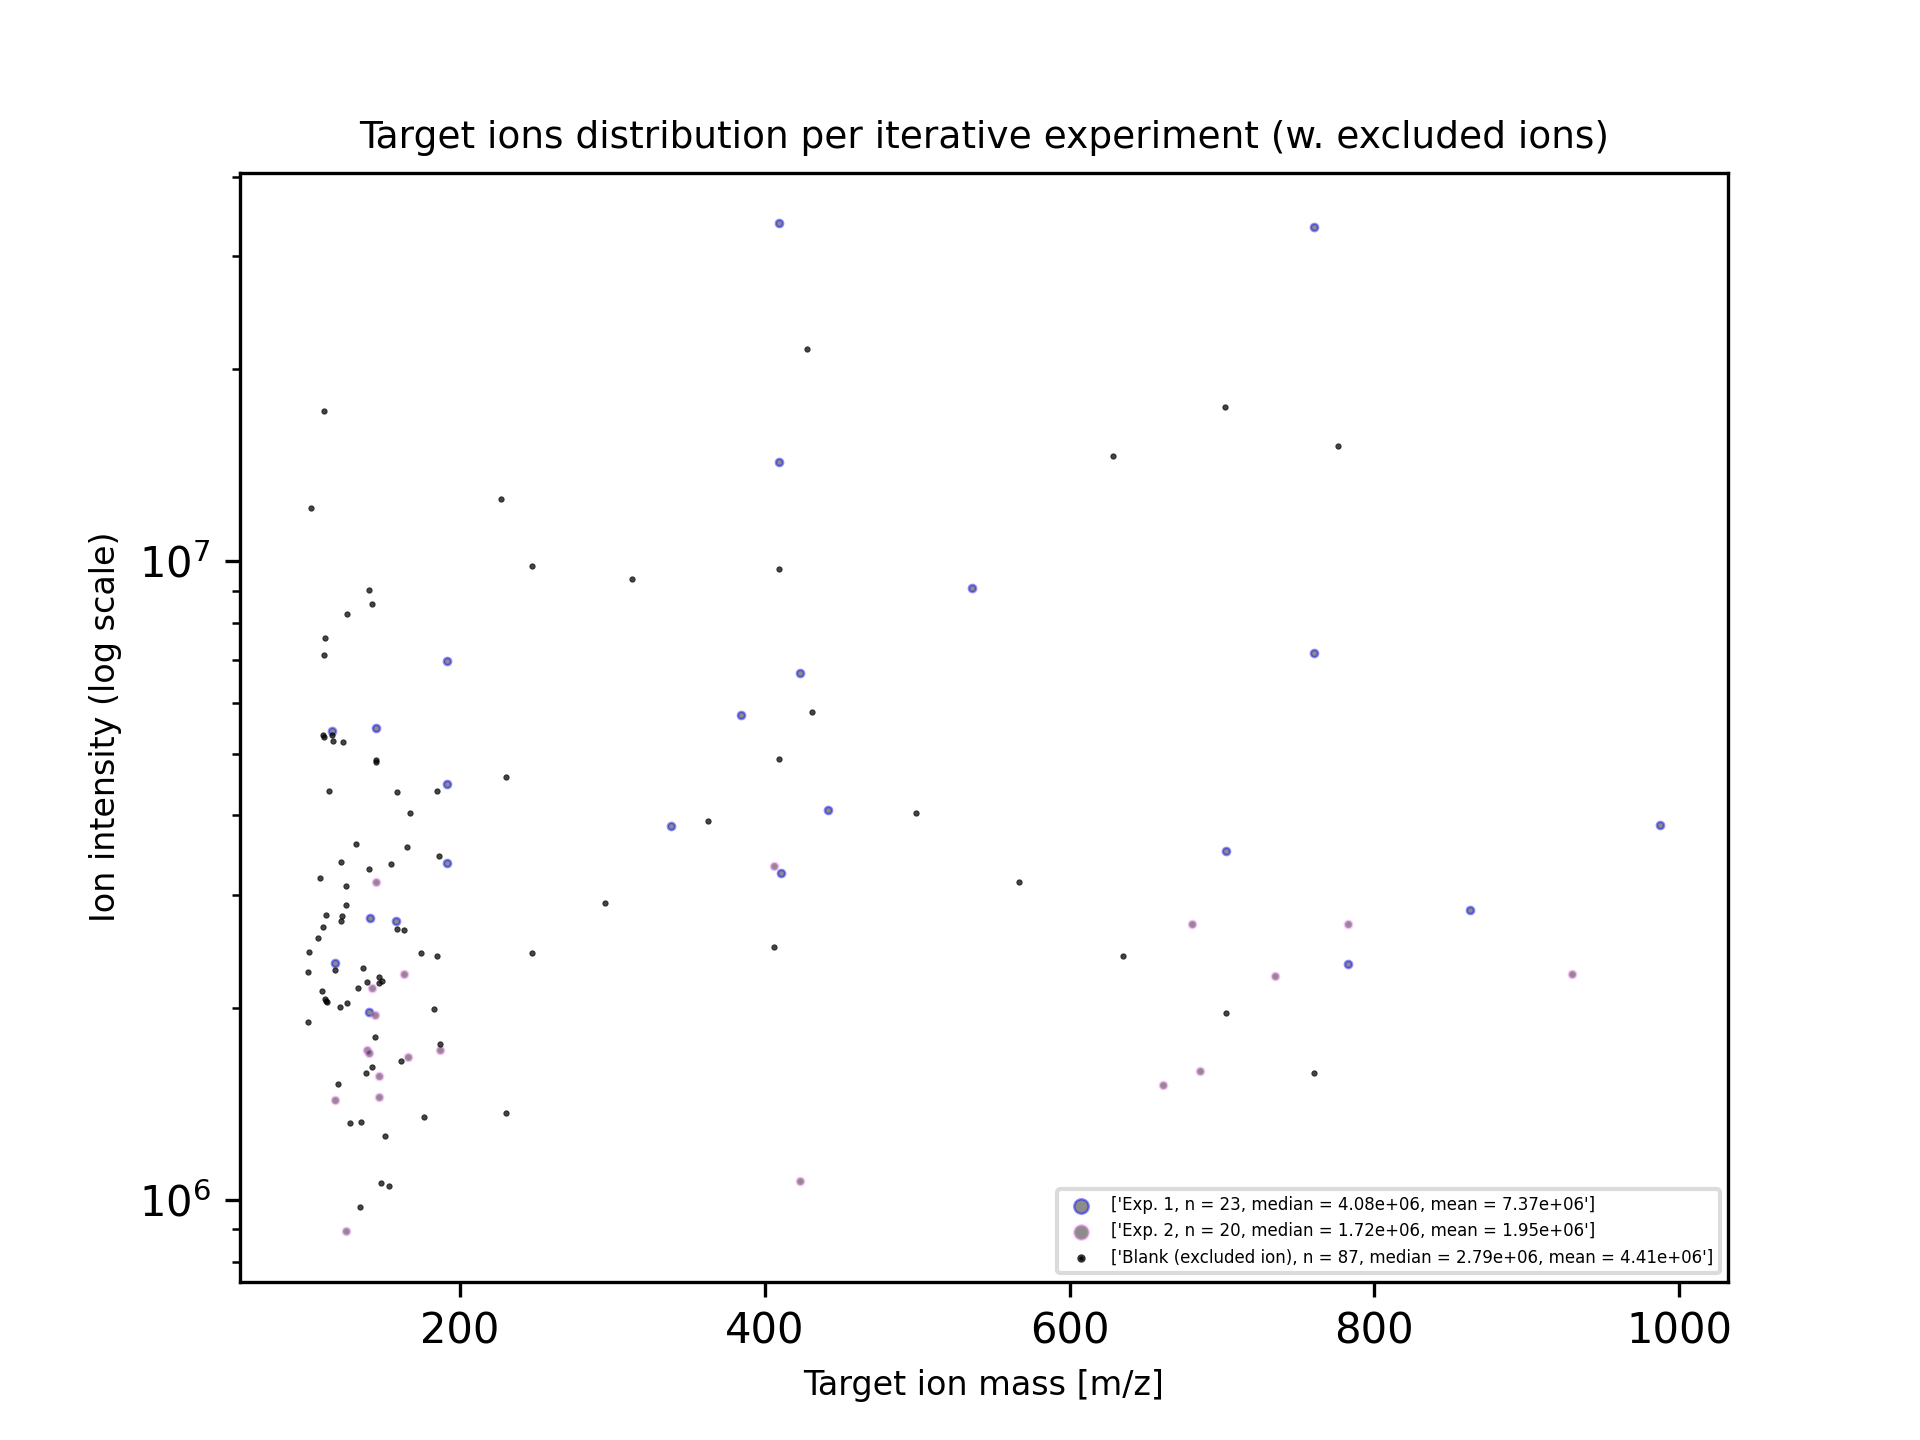

In [35]:
from IPython.display import Image
import glob

filename = glob.glob('results_targeted/plots/*_shared_MZ_TARGETED_scatter_plot.png')
Image(filename[0])

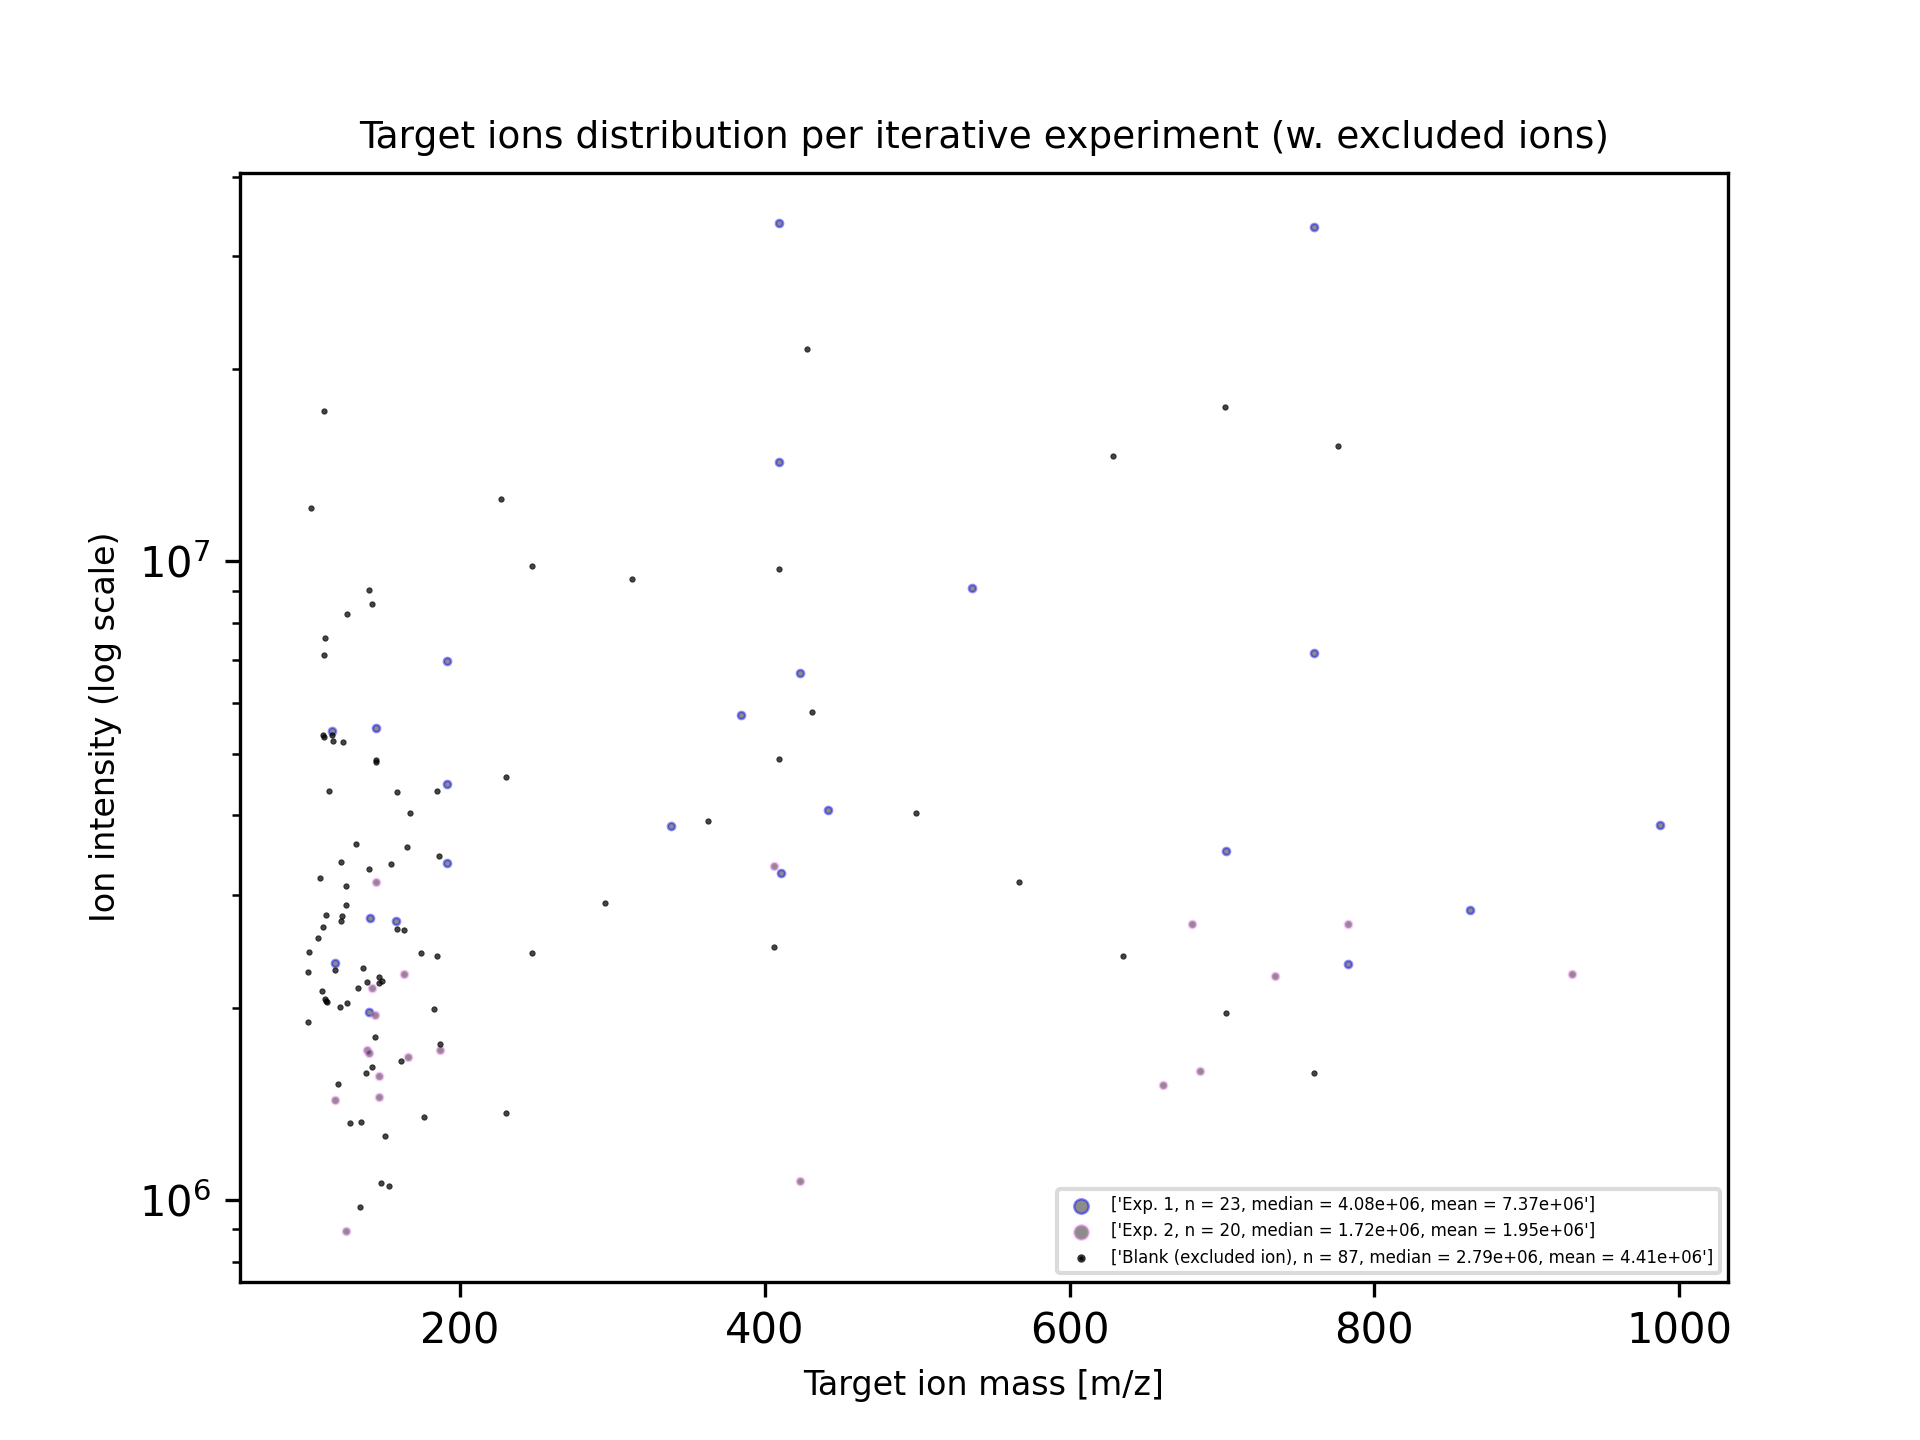

In [36]:
filename = glob.glob('results_targeted/plots/*_shared_MZ_TARGETED_scatter_plot.png')
Image(filename[0])

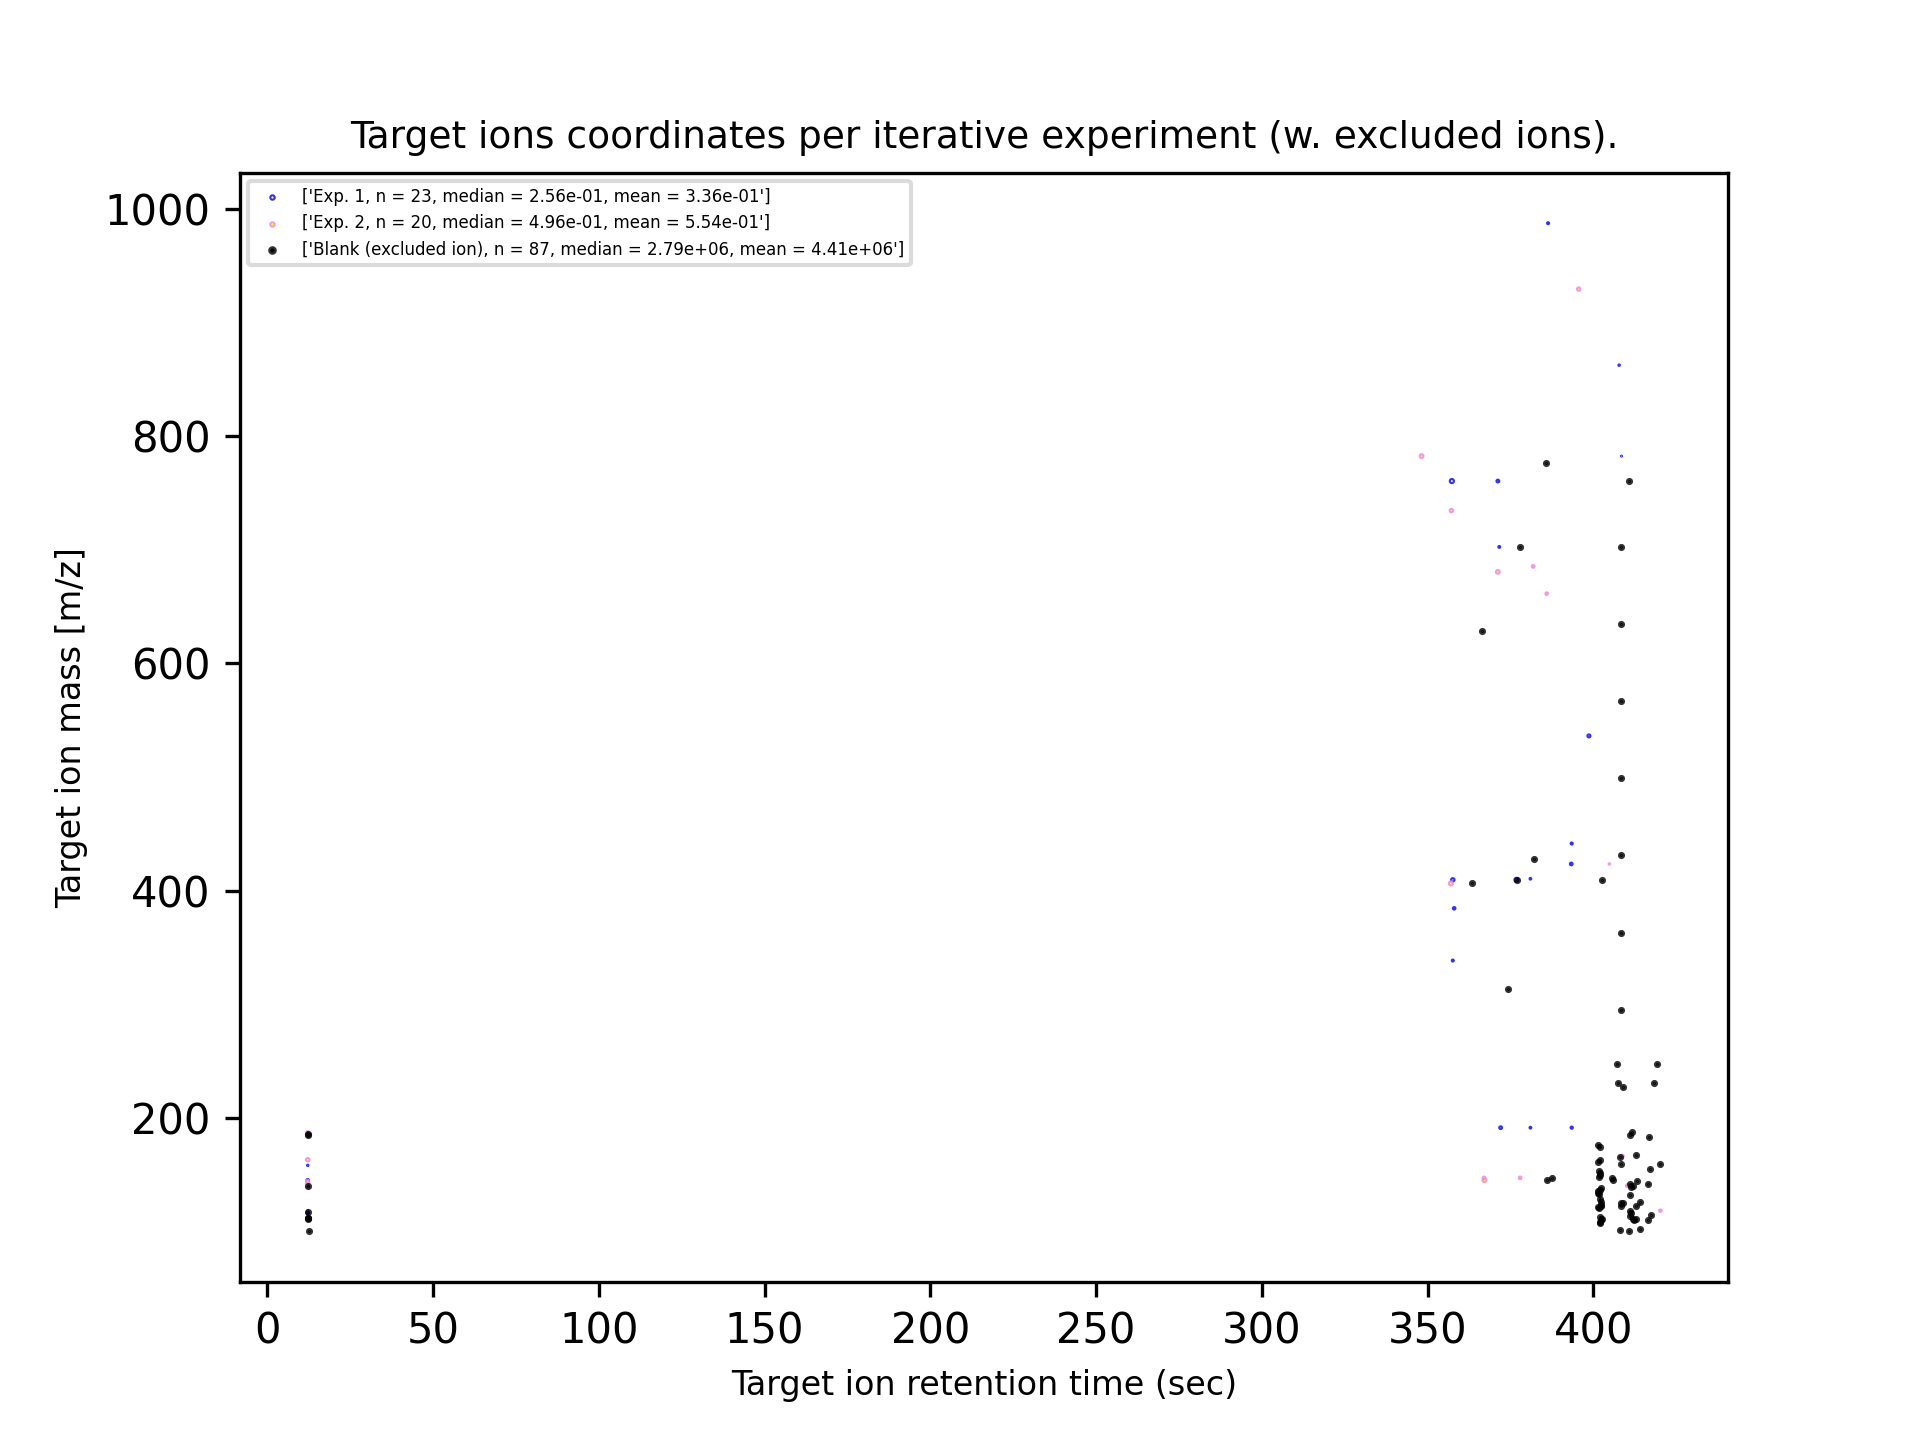

In [38]:
filename = glob.glob('results_targeted/plots/*_blank_shared_MZ_RT_TARGETED_scatter_plot.png')
Image(filename[0])

### Step 10 - Download the results

Run the cell below to display the download links for the:
- **IODA-targeted workflow results** -> `download_results/IODA_targeted_results.zip`

- (Optional) - **The OpenMS results file** -> 
`download_results/IODA_OpenMS_results.zip`.
You can open the featureXML and consensusXML files with [OpenMS/TOPPView](https://github.com/OpenMS/OpenMS/releases) to inspect the quality of feature detection and alignment.

In [16]:
from download_link_jupyterlab import DownloadFileLink
display(DownloadFileLink('download_results/IODA_targeted_results.zip', file_name='download_results/IODA_targeted_results.zip', link_text='Download the IODA targeted workflow results from download_results/IODA_targeted_results.zip'))
display(DownloadFileLink('download_results/IODA_OpenMS_results.zip', file_name='download_results/IODA_OpenMS_results.zip', link_text='(Optional) Download the OpenMS results files from download_results/IODA_OpenMS_results.zip'))

/home/jovyan/download_results/IODA_targeted_results.zip

/home/jovyan/download_results/IODA_OpenMS_results.zip

### Step 11 - Prepare your IODA experiment
Prepare the iterative mass spectrometry acquisition. For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).